Name: Sanjeev Kumar Khatri

Roll no : 23

Group : CS

Assignment : 02

Githublink : https://github.com/darkamgel/machinelearning-LAB

## Practical Assignment - 2 ##
1. Classifying with Real world Examples 
2. The Iris dataset
3. Building more complex classifier
4. A more complex dataset and a more complex classifier classifying with sckit-learn
5. Binary and multiclass classification

### Classifying with Real world Examples ### 

* what classification is
* How Scikit-learn can be used for classification and which classifier is a goof solution for most problems
* How to strictly evaluate a classifier and avoid fooling ourselves

In [1]:
import sys
sys.version

'3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]'

In [2]:
# importing pandas matplotlib and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Knowing the Data i.e `The Iris Dataset ` ###

This dataset a collection of morphological measurement of several iris flower. These measurement will enable us to distinguish multiple sepcies of flower.

The following four attributes of each plant were measured:
* Sepal length
* Sepal width
* Petal length
* Petal width



In [3]:
# importing Iris Dataset
from sklearn.datasets import load_iris
data = load_iris()
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names
labels = target_names[target] 

#### Visulaizing the give data set 

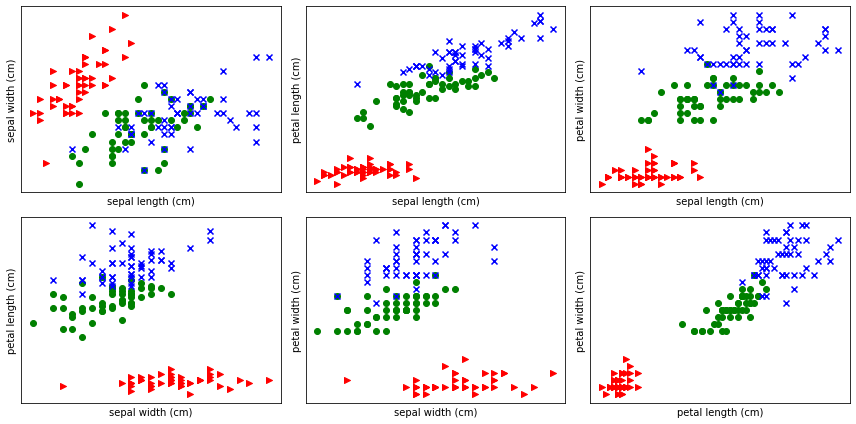

In [5]:
from matplotlib.pyplot import figure


fig , axes = plt.subplots(2,3) # 2 columns and 3 rows in figure
fig.set_size_inches(12, 6)
pairs = [(0,1) , (0,2) ,(0,3) , (1,2) , (1,3) , (2,3)]

# different colors lists
color_markers = [
                 ('r' , '>'),
                 ('g' , 'o'),
                 ('b' , 'x'),
                 ]

for i , (p0 , p1) in enumerate(pairs):
  ax = axes.flat[i]

  for t in range(3):
    c,marker = color_markers[t]
    ax.scatter(features[target == t , p0],
               features[target == t ,p1],
               marker = marker,
               c = c
               )
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])


fig.tight_layout()

### Classifying with the scikit-learn ###
> scikit-learn has become the standard library for many machine learning tasks, including classification

> we are going to use its implementation of decison trees.


In [6]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(min_samples_leaf = 10)
tr.fit(features,labels)

DecisionTreeClassifier(min_samples_leaf=10)

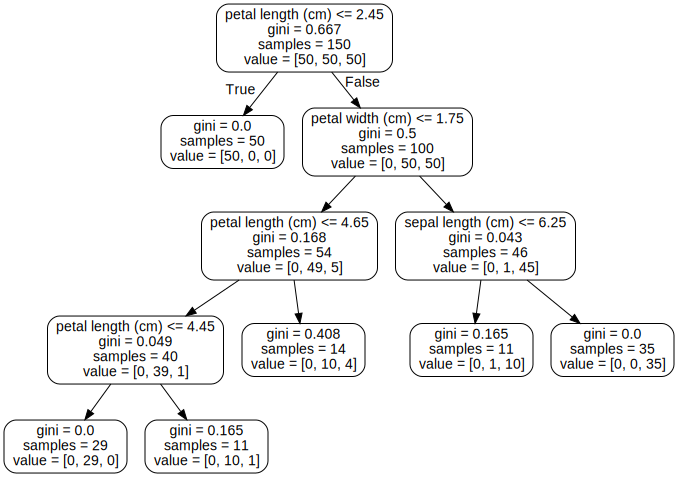

In [7]:
import graphviz
tree.export_graphviz(tr , feature_names = feature_names , rounded = True , out_file = 'decision.dot')

graphviz.Source(open('decision.dot').read())

We can see that the first split is petal width and results in two nodes, one node where all the samples are of the first class (denoted by [50,0,0]) and the rest of the data ([0,50,50]).

In [9]:
predictions = tr.predict(features)
print("Accuracy: {:.1%}".format(np.mean(predictions==labels)))

Accuracy: 96.0%


In [10]:
from sklearn import model_selection
predictions = model_selection.cross_val_predict(
    tr,
    features,
    labels,
    cv = model_selection.LeaveOneOut()
)

print(np.mean(predictions == labels))

0.9533333333333334


In [11]:
import numpy as np


def load_dataset(dataset_name):
    features = []
    target = []
    target_names = set()
    with open('seeds.tsv'.format(dataset_name)) as ifile:
        for line in ifile:
            tokens = line.strip().split('\t')
            features.append([float(tk) for tk in tokens[:-1]])
            target.append(tokens[-1])
            target_names.add(tokens[-1])
    features = np.array(features)

    target_names = list(target_names)
    target_names.sort()
    target = np.array([target_names.index(t) for t in target])
    return {
            'features': features,
            'target_names': target_names,
            'target': target,
            }

In [12]:

feature_names = [
    'area',
    'perimeter',
    'compactness',
    'length of kernel',
    'width of kernel',
    'asymmetry coefficien',
    'length of kernel groove',
]
data = load_dataset('seeds')
features = data['features']
target = data['target']


### Using K-Nearest Neigbors Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [14]:
kf = model_selection.KFold(n_splits = 5 , shuffle = False)
means = []
for training , testing in kf.split(features):
  # we learn a model for this fold with `fit` and then apply to the
  # testing data with `predict`
  knn.fit(features[training] , target[training]) 
  prediction = knn.predict(features[testing]) 

  # np.mean on an array of booleans returns fraction
  # of correct decisions for this fold
  curmean = np.mean(prediction == target[testing])
  means.append(curmean)
print('Mean accuracy:{:.1%}'.format(np.mean(means)))


Mean accuracy:83.8%


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier = Pipeline([('norm',StandardScaler()),
                        ('knn' , classifier)
                        ])

means = []
for training , testing in kf.split(features):
  classifier.fit(features[training] , target[training])
  prediction = classifier.predict(features[testing])

  curmean  = np.mean(prediction == target[testing])
  means.append(curmean)

print('Mean accuracy : {:.1%}'.format(np.mean(means)))


Mean accuracy : 86.7%


In [16]:
def plot_decision_space(clf , features , target , use_color = True):
  from matplotlib.colors import ListedColormap

  clf.fit(features[:, [0,2]] , target)

# we will call predict on a grid of features values(1000 by 1000 points):
  y0 , y1 = features[:, 2].min() * .9 , features[: , 2].max() * 1.1
  x0 , x1 = features[:, 0].min() * .9 , features[: , 0].max() * 1.1
  x = np.linspace(x0,x1,1000)
  y = np.linspace(y0 , y1 , 1000)
  x,y = np.meshgrid(x,y)
  c = clf.predict(np.vstack([x.ravel() , y.ravel()]).T).reshape(x.shape)

# Now ,we plot the decision boundaries
  if use_color:
    cmap = ListedColormap([(1., .7, .7) , (.7, 1., .7) , (.7, .7 , 1.)])
  else:
    cmap = ListedColormap([(1., 1., 1.) , (.2, .2, .2) , (.6, .6 , .6)])

  fig , ax = plt.subplots()
  fig.set_size_inches(12, 6)

  ax.scatter(features[:, 0], features[:, 2], c=target, cmap=cmap)
  for lab,ma in zip(range(3), "Do^"):
    ax.plot(features[target == lab , 0] ,
            features[target == lab,2],
            ma,
            c=(1., 1. , 1.),
            ms = 6
            )
  ax.set_xlim(x0,x1)
  ax.set_ylim(y0,y1)
  ax.set_xlabel(feature_names[0])
  ax.set_ylabel(feature_names[2])
  ax.pcolormesh(x,y,c , cmap = cmap)
  return fig

    



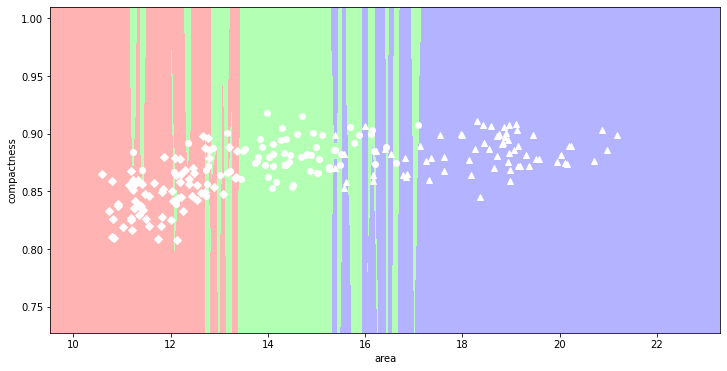

In [17]:
_= plot_decision_space(knn , features , target)

In [18]:
from sklearn.preprocessing import StandardScaler

classifier = KNeighborsClassifier(n_jobs= 1)
classifier = Pipeline([('norm', StandardScaler()),
                       ('Knn',classifier)
                       ])

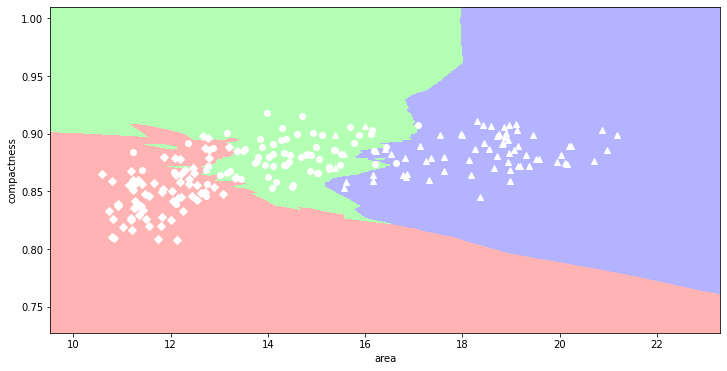

In [19]:
_ = plot_decision_space(classifier,features , target)

### Random forests

In [20]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)

In [21]:
predict = model_selection.cross_val_predict(rf , features , target)
print("RF accuracy: {:.1%}".format(np.mean(predict == target)))

RF accuracy: 89.0%


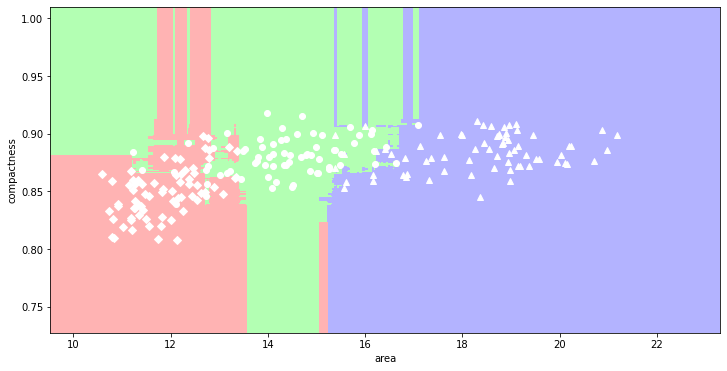

In [22]:
_= plot_decision_space(rf,features ,target)